In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [46]:
df = pd.read_csv("Tweets.csv")

In [47]:
def advanced_eda(df):
    Type = df.dtypes
    Unique_Values = df.apply(lambda x: x.unique())
    
    Null_Number = df.apply(lambda x: x.isnull().sum())
    Null_Pourcentage = df.apply(lambda x: 100*x.isnull().sum()/len(x))
    eda_table = pd.concat([Type,Unique_Values,Null_Number,Null_Pourcentage],axis = 1, names=['Type','Unique_Values','Null_Number','Null_Pourcentage'])
    eda_table = eda_table.rename(columns={0 : 'Type', 1 : 'Unique_Values', 2:'Null_Number', 3:'Null_Pourcentage'})
    return eda_table 
    
advanced_eda(df)

,Type,Unique_Values,Null_Number,Null_Pourcentage
tweet_id,int64,"[570306133677760513, 570301130888122368, 57030...",0,0.000000
airline_sentiment,object,"[neutral, positive, negative]",0,0.000000
airline_sentiment_confidence,float64,"[1.0, 0.3486, 0.6837, 0.6745, 0.634, 0.6559, 0...",0,0.000000
negativereason,object,"[nan, Bad Flight, Can't Tell, Late Flight, Cus...",5462,37.308743
negativereason_confidence,float64,"[nan, 0.0, 0.7033, 1.0, 0.6842, 0.3684, 0.3614...",4118,28.128415
airline,object,"[Virgin America, United, Southwest, Delta, US ...",0,0.000000
airline_sentiment_gold,object,"[nan, negative, neutral, positive]",14600,99.726776
name,object,"[cairdin, jnardino, yvonnalynn, cjmcginnis, pi...",0,0.000000
negativereason_gold,object,"[nan, Late Flight\nFlight Attendant Complaints...",14608,99.781421
retweet_count,int64,"[0, 1, 2, 3, 4, 5, 7, 22, 6, 18, 15, 31, 11, 8...",0,0.000000


In [48]:
df = df.drop(["tweet_id","airline_sentiment_gold","negativereason_gold","tweet_coord","name"],axis=1)
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Number of tweets for each airline company 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


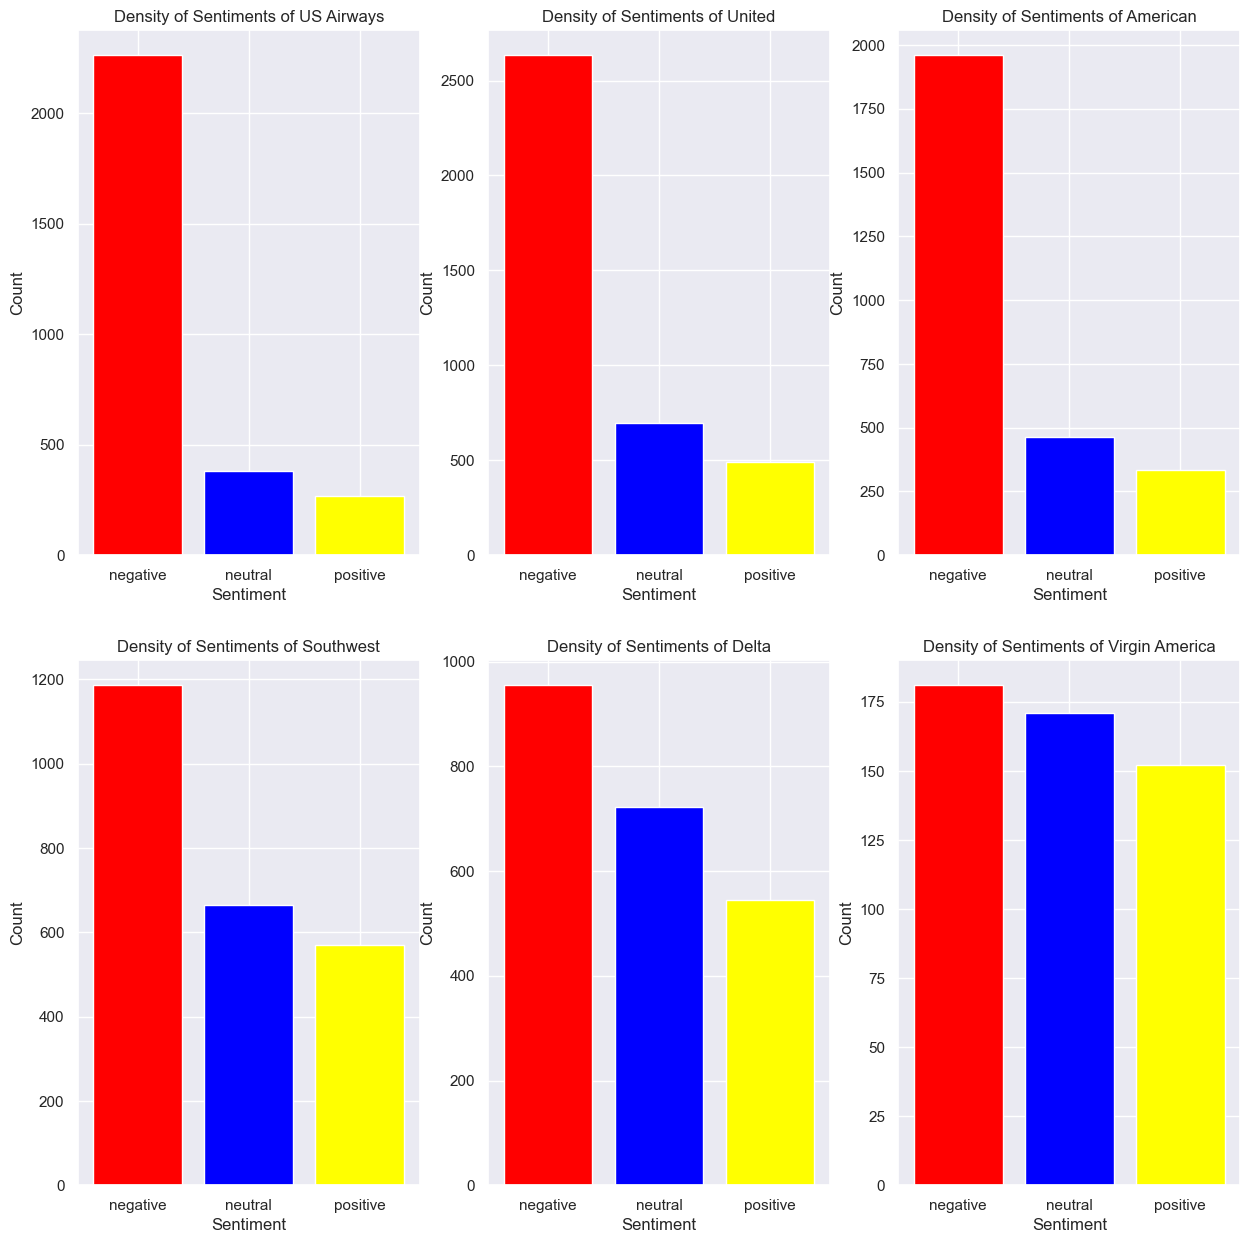

In [49]:
print("Number of tweets for each airline company \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(15, 15))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    temp_df=df[df['airline']==i]
    count=temp_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'blue', 'yellow'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Count')
    plt.xlabel('Sentiment')
    plt.title('Density of Sentiments of '+i)

In [50]:
df = df[df['airline_sentiment'].str.contains('neutral')==False]


<Axes: >

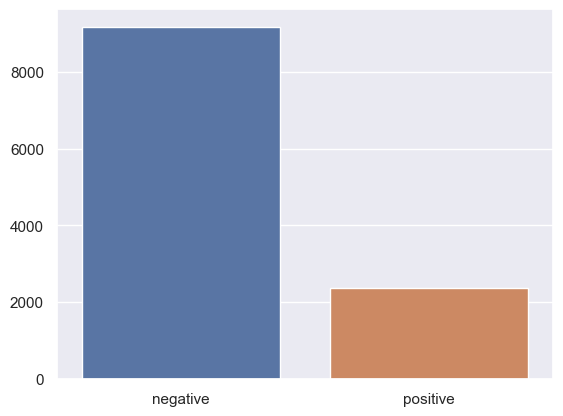

In [51]:
sns.barplot(x=df['airline_sentiment'].value_counts().index,y=df['airline_sentiment'].value_counts().values,data=df)


<Axes: >

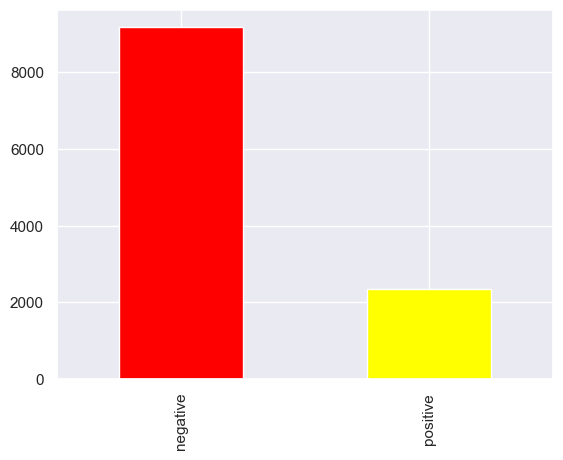

In [52]:
df['airline_sentiment'].value_counts().plot(kind='bar',color=['red','yellow'])


In [53]:
# ************************************************ duplictaes processing ********************************
df.text.duplicated().sum()
df_dupli = df[df.text.duplicated()== True]
df = df.drop_duplicates('text')

In [54]:
def tweet_processing(title, lower_case=True, stop_words=True, stem=True, lemma=True, contrac=True):
   
    if lower_case:
        title = title.lower()
    
    title = " ".join( contractions.fix(word) for word in title.split() )
    
    title = re.sub(r'w/', ' ', title)
    title = re.sub('<[^<]+?>', '', title)
    title = re.sub(r'https?:\/\/.*[\r\n]*', '', title, flags=re.MULTILINE)
    title = re.sub(r'@\w+', '', title)
    title = re.sub(r'\<a href', ' ', title)
    title = re.sub(r'&amp;', '', title)
    title = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', title)
    title = re.sub(r'<br />', ' ', title)
    title = re.sub(r'\'', ' ', title)

    tokens = word_tokenize(title)
    tokens = [word for word in tokens if word.isalpha()]

    if stop_words:
        sw = set(stopwords.words('english'))
        tokens = [word for word in tokens if not word in sw]
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
    if lemma:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    title = " ".join(tokens)
    return title

In [55]:
# *********************************** Data preparation *******************************
df['Clean_Tweet'] = df.text.apply(tweet_processing)


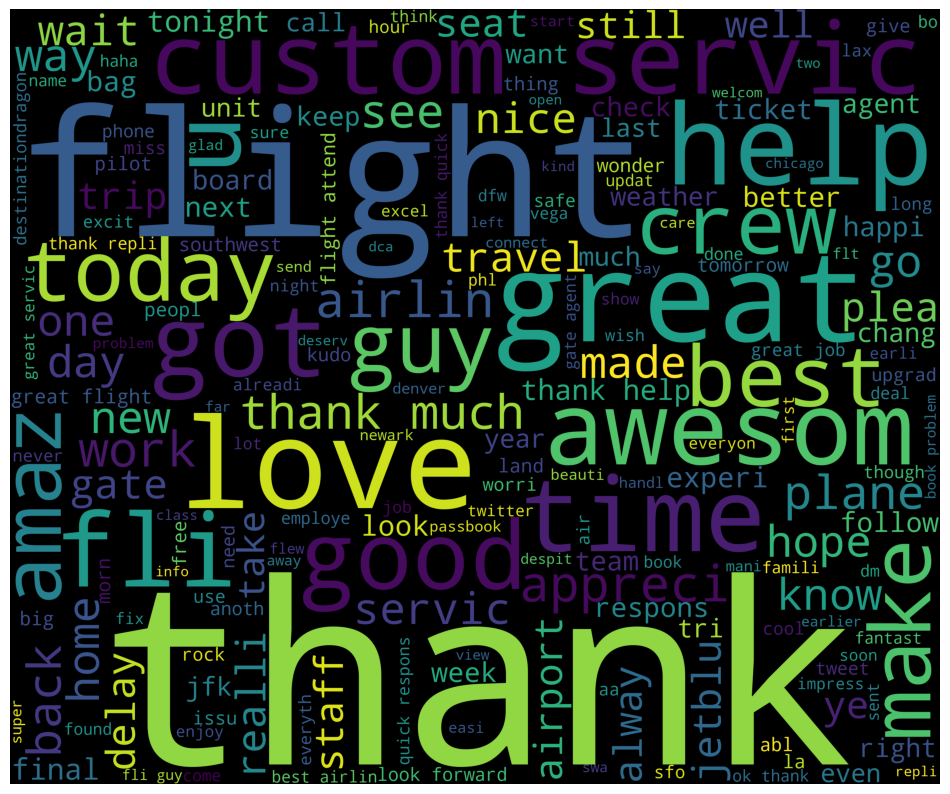

In [56]:
from wordcloud import WordCloud,STOPWORDS

df_wc=df[df['airline_sentiment']=='positive']
words = ' '.join(df_wc['Clean_Tweet'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black', width=3000,height=2500).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

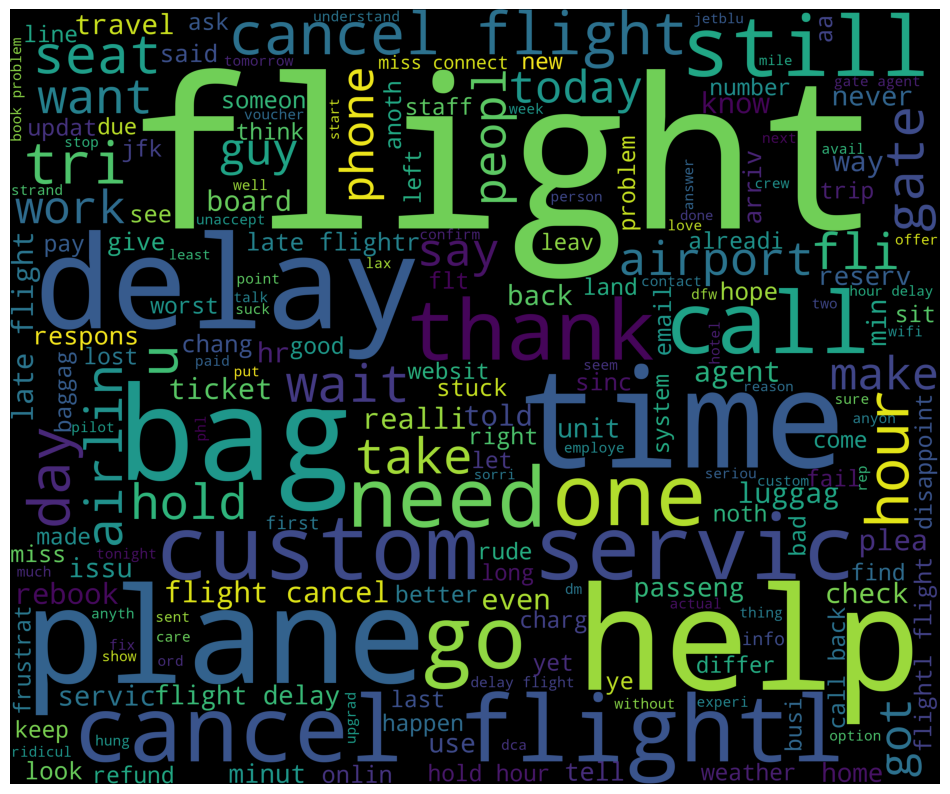

In [57]:
df_wc=df[df['airline_sentiment']=='negative']
words = ' '.join(df_wc['Clean_Tweet'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black', width=3000,height=2500).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['airline_sentiment'] = le.fit_transform( df['airline_sentiment'])


In [59]:
from sklearn.model_selection import train_test_split

X = df.Clean_Tweet
y = df.airline_sentiment

In [60]:
# Create a matrix of TF-IDF features from the titles
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vectors = vectorizer.fit_transform(X)

In [61]:
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
eval_set = [(train_vectors, y_train), (test_vectors, y_test)]

In [62]:
# *********************************** Model Creation *******************************
SVM_clf = svm.SVC().fit(train_vectors, y_train)
MNB_clf = MultinomialNB().fit(train_vectors, y_train)
LR_clf = LogisticRegression(random_state = 0).fit(train_vectors, y_train)
RF_clf = RandomForestClassifier(n_estimators = 100).fit(train_vectors, y_train)
DT_clf = DecisionTreeClassifier().fit(train_vectors, y_train)
XGB_clf = XGBClassifier().fit(train_vectors, y_train, early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set)

[0]	validation_0-error:0.11555	validation_0-logloss:0.53779	validation_1-error:0.13131	validation_1-logloss:0.54221
[1]	validation_0-error:0.11446	validation_0-logloss:0.45454	validation_1-error:0.13175	validation_1-logloss:0.46079
[2]	validation_0-error:0.11237	validation_0-logloss:0.40492	validation_1-error:0.12736	validation_1-logloss:0.41150
[3]	validation_0-error:0.11171	validation_0-logloss:0.37323	validation_1-error:0.12912	validation_1-logloss:0.38224
[4]	validation_0-error:0.11138	validation_0-logloss:0.35203	validation_1-error:0.12824	validation_1-logloss:0.36287
[5]	validation_0-error:0.11149	validation_0-logloss:0.33579	validation_1-error:0.12297	validation_1-logloss:0.34671
[6]	validation_0-error:0.10929	validation_0-logloss:0.32501	validation_1-error:0.12297	validation_1-logloss:0.33657
[7]	validation_0-error:0.10764	validation_0-logloss:0.31700	validation_1-error:0.12341	validation_1-logloss:0.32898
[8]	validation_0-error:0.10743	validation_0-logloss:0.30982	validation_1

D:\PROGRAMS\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\PROGRAMS\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-error:0.10204	validation_0-logloss:0.28600	validation_1-error:0.11814	validation_1-logloss:0.30653
[14]	validation_0-error:0.10094	validation_0-logloss:0.28079	validation_1-error:0.11902	validation_1-logloss:0.30301
[15]	validation_0-error:0.10051	validation_0-logloss:0.27729	validation_1-error:0.11946	validation_1-logloss:0.30032
[16]	validation_0-error:0.09886	validation_0-logloss:0.27403	validation_1-error:0.11814	validation_1-logloss:0.29915
[17]	validation_0-error:0.09743	validation_0-logloss:0.27084	validation_1-error:0.11682	validation_1-logloss:0.29689
[18]	validation_0-error:0.09699	validation_0-logloss:0.26835	validation_1-error:0.11594	validation_1-logloss:0.29488
[19]	validation_0-error:0.09611	validation_0-logloss:0.26591	validation_1-error:0.11594	validation_1-logloss:0.29284
[20]	validation_0-error:0.09578	validation_0-logloss:0.26353	validation_1-error:0.11594	validation_1-logloss:0.29120
[21]	validation_0-error:0.09501	validation_0-logloss:0.26125	val

[84]	validation_0-error:0.06854	validation_0-logloss:0.18459	validation_1-error:0.10233	validation_1-logloss:0.25281
[85]	validation_0-error:0.06810	validation_0-logloss:0.18397	validation_1-error:0.10277	validation_1-logloss:0.25239
[86]	validation_0-error:0.06766	validation_0-logloss:0.18327	validation_1-error:0.10277	validation_1-logloss:0.25206
[87]	validation_0-error:0.06744	validation_0-logloss:0.18257	validation_1-error:0.10189	validation_1-logloss:0.25169
[88]	validation_0-error:0.06711	validation_0-logloss:0.18199	validation_1-error:0.10277	validation_1-logloss:0.25154
[89]	validation_0-error:0.06700	validation_0-logloss:0.18139	validation_1-error:0.10321	validation_1-logloss:0.25123
[90]	validation_0-error:0.06711	validation_0-logloss:0.18082	validation_1-error:0.10277	validation_1-logloss:0.25104
[91]	validation_0-error:0.06678	validation_0-logloss:0.17997	validation_1-error:0.10277	validation_1-logloss:0.25115
[92]	validation_0-error:0.06634	validation_0-logloss:0.17928	val

In [63]:
# ****************************** Evaluating predictions *************************
from sklearn.metrics import accuracy_score

print("SVM model")
SVM_predictions = SVM_clf.predict(test_vectors)
print(accuracy_score(y_test, SVM_predictions))
print("MNB model")
MNB_predictions = MNB_clf.predict(test_vectors)
print(accuracy_score(y_test, MNB_predictions))
print("XGB model")
XGB_predictions = XGB_clf.predict(test_vectors)
print(accuracy_score(y_test, XGB_predictions))
print("LR model")
LR_predictions = LR_clf.predict(test_vectors)
print(accuracy_score(y_test, LR_predictions))
print("RF model")
RF_predictions = RF_clf.predict(test_vectors)
print(accuracy_score(y_test, RF_predictions))
print("DT model")
DT_predictions = DT_clf.predict(test_vectors)
print(accuracy_score(y_test, DT_predictions))

SVM model
0.9130434782608695
MNB model
0.8559508124725516
XGB model
0.898989898989899
LR model
0.9077733860342556
RF model
0.9099692577953448
DT model
0.8572683355292051


In [64]:
from sklearn.metrics import classification_report
target_names = ['positive','negative']
print("SVM classification report")
print(classification_report(y_test, SVM_predictions, target_names=target_names))
print("MNB classification report")
print(classification_report(y_test, MNB_predictions, target_names=target_names))
print("XGB classification report")
print(classification_report(y_test, XGB_predictions, target_names=target_names))
print("LR classification report")
print(classification_report(y_test, LR_predictions, target_names=target_names))
print("RF classification report")
print(classification_report(y_test, RF_predictions, target_names=target_names))
print("DT classification report")
print(classification_report(y_test, DT_predictions, target_names=target_names))
 

SVM classification report
              precision    recall  f1-score   support

    positive       0.92      0.98      0.95      1838
    negative       0.88      0.64      0.74       439

    accuracy                           0.91      2277
   macro avg       0.90      0.81      0.84      2277
weighted avg       0.91      0.91      0.91      2277

MNB classification report
              precision    recall  f1-score   support

    positive       0.85      1.00      0.92      1838
    negative       1.00      0.25      0.40       439

    accuracy                           0.86      2277
   macro avg       0.92      0.63      0.66      2277
weighted avg       0.88      0.86      0.82      2277

XGB classification report
              precision    recall  f1-score   support

    positive       0.91      0.97      0.94      1838
    negative       0.81      0.62      0.70       439

    accuracy                           0.90      2277
   macro avg       0.86      0.79      0.82      2

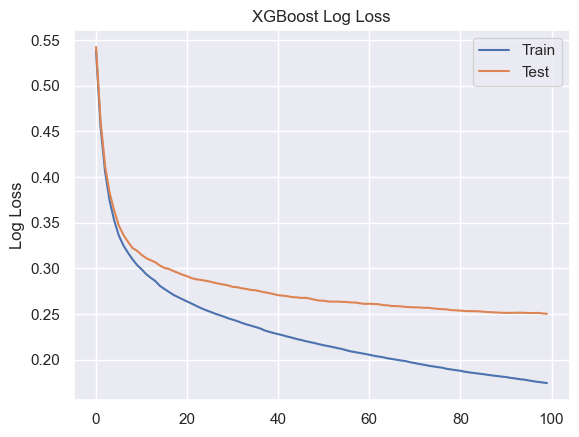

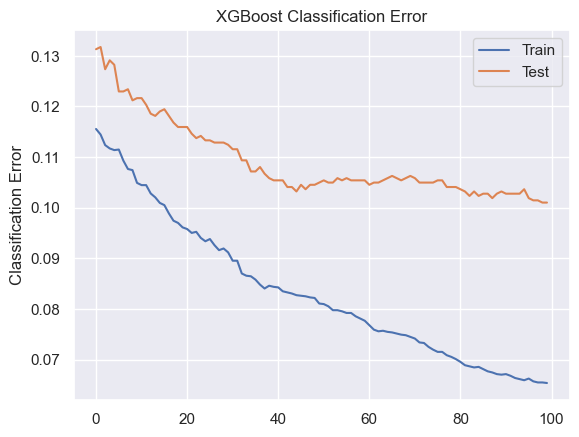

In [65]:
#********************************** XGBoost model fit plot *********************************
import matplotlib.pyplot as pyplot

results = XGB_clf.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()